#Set up

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%pip install ultralytics
!pip install roboflow

#Making dataset

Make directories

In [ ]:
# !mkdir -p '/content/drive/MyDrive/DL - GP/dataset/images/train'
# !mkdir -p '/content/drive/MyDrive/DL - GP/dataset/images/val'
# !mkdir -p '/content/drive/MyDrive/DL - GP/dataset/images/test'
# !mkdir -p '/content/drive/MyDrive/DL - GP/dataset/labels/train'
# !mkdir -p '/content/drive/MyDrive/DL - GP/dataset/labels/val'
# !mkdir -p '/content/drive/MyDrive/DL - GP/dataset/labels/test'

Distribute the images and label. GPT

In [ ]:
# import os
# import shutil
# import random

# # Define paths
# images_dir = 'path/to/your/images'
# labels_dir = 'path/to/your/labels'
# output_dir = 'dataset'

# # Define output directories
# train_images_dir = os.path.join(output_dir, 'images/train')
# val_images_dir = os.path.join(output_dir, 'images/val')
# test_images_dir = os.path.join(output_dir, 'images/test')

# train_labels_dir = os.path.join(output_dir, 'labels/train')
# val_labels_dir = os.path.join(output_dir, 'labels/val')
# test_labels_dir = os.path.join(output_dir, 'labels/test')

# # Create output directories if they don't exist
# os.makedirs(train_images_dir, exist_ok=True)
# os.makedirs(val_images_dir, exist_ok=True)
# os.makedirs(test_images_dir, exist_ok=True)
# os.makedirs(train_labels_dir, exist_ok=True)
# os.makedirs(val_labels_dir, exist_ok=True)
# os.makedirs(test_labels_dir, exist_ok=True)

# # Get list of image files
# image_files = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]

# # Define split ratios
# train_ratio = 0.7
# val_ratio = 0.2
# test_ratio = 0.1

# # Calculate split indices
# train_end = int(train_ratio * len(image_files))
# val_end = train_end + int(val_ratio * len(image_files))

# # Split the data
# train_files = image_files[:train_end]
# val_files = image_files[train_end:val_end]
# test_files = image_files[val_end:]

# def move_files(files, src_dir, dest_img_dir, dest_lbl_dir):
#     for file in files:
#         image_path = os.path.join(src_dir, file)
#         label_path = os.path.join(labels_dir, file.replace('.jpg', '.txt').replace('.png', '.txt'))

#         if os.path.exists(label_path):
#             shutil.copy(image_path, dest_img_dir)
#             shutil.copy(label_path, dest_lbl_dir)
#         else:
#             print(f"Label for {file} not found!")

# # Move the files
# move_files(train_files, images_dir, train_images_dir, train_labels_dir)
# move_files(val_files, images_dir, val_images_dir, val_labels_dir)
# move_files(test_files, images_dir, test_images_dir, test_labels_dir)

# print("Data split completed!")


#Train

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 81.5MB/s]


In [ ]:
data_train='/content/drive/MyDrive/DL - GP/dataset/data_train.yaml'

In [ ]:
augmentation_params = {
    'hsv_h': 0.015,    # Adjust the hue of the image by a fraction
    'hsv_s': 0.2,      # Alters the saturation of the image by a fraction
    'hsv_v': 0.2,      # Modifies the value (brightness) of the image by a fraction
    'degrees': 10.0,   # Rotates the image randomly within the specified degree range
    'translate': 0.1,  # Translate the image by a fraction of the width/height
    #'scale': 0.5,      # Scale the image by a fraction
    #'shear': 2.0,      # Shear the image by a fraction
    #'perspective': 0.0,  # Apply perspective transformation
    'flipud': 0.5,     # Flip the image vertically with probability
    'fliplr': 0.5,     # Flip the image horizontally with probability
    'mosaic': 0.0,     # Apply mosaic augmentation with probability
    'mixup': 0.0       # Apply mixup augmentation with probability
}

In [ ]:
results = model.train(
    data=data_train,
    epochs=100,
    patience=7, #prevent overfit
    # batch= \ can be non fixed.
    imgsz=640,
    save=True,
    device=0,  # zero for one gpu. 0,1 for multiple gpu
    pretrained=True,  # Lock all but dense(?)
    optimizer='auto', #put adam/adamW?
    verbose=True,
    seed=1,
    fraction=1,  # only to test it works. 1 for full training
    # freeze= dependent on what pretrained does
    # lr0= normal learning rate lrf= is fraction of initial learning rate at the end
    weight_decay=0.001, #L2
    dropout=0.3,
    val=True,
    plots=True,
    augment=True,
    **augmentation_params
)


Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/DL - GP/dataset/data_train.yaml, epochs=100, time=None, patience=7, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=1, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.3, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 15.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/DL - GP/dataset/labels/train.cache... 1687 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1687/1687 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/DL - GP/dataset/labels/val.cache... 482 images, 0 backgrounds, 0 corrupt: 100%|██████████| 482/482 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.28G       1.24      2.893      1.825          8        640: 100%|██████████| 106/106 [00:36<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.56it/s]

                   all        482        525      0.875      0.564      0.629      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.25G      1.363       2.23      1.983          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.11it/s]

                   all        482        525      0.618       0.51      0.446      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.29G      1.406      1.882      2.057          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.15it/s]

                   all        482        525      0.829      0.571      0.627      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.27G      1.336      1.686      1.963          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.19it/s]

                   all        482        525        0.8       0.51       0.61       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.27G      1.313      1.587      1.945          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.13it/s]

                   all        482        525      0.665      0.446      0.522      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.26G      1.275      1.525      1.893          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.06it/s]

                   all        482        525      0.535      0.497      0.502      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.27G      1.281      1.458      1.891          7        640: 100%|██████████| 106/106 [00:16<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.15it/s]

                   all        482        525        0.9      0.571      0.681      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.26G      1.237      1.415      1.846         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.38it/s]

                   all        482        525      0.864      0.582      0.695      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.27G      1.171      1.345      1.782          9        640: 100%|██████████| 106/106 [00:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.49it/s]

                   all        482        525      0.881      0.606      0.709      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.26G      1.106      1.264      1.731          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.32it/s]

                   all        482        525      0.842      0.646      0.761      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.26G      1.113      1.265      1.743          9        640: 100%|██████████| 106/106 [00:15<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.39it/s]

                   all        482        525      0.889      0.621      0.722      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.27G      1.101      1.239       1.71          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.46it/s]

                   all        482        525       0.91      0.598      0.728      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.26G      1.064      1.175      1.681          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.35it/s]

                   all        482        525      0.887      0.642      0.779      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.26G      1.055       1.16      1.665          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.45it/s]

                   all        482        525      0.904      0.621      0.755      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.26G      1.065      1.187      1.675          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.23it/s]

                   all        482        525      0.883       0.67      0.786      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.29G      1.033      1.146      1.637          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.21it/s]

                   all        482        525      0.837      0.655       0.76      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.27G      1.027      1.146      1.646          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.03it/s]

                   all        482        525      0.916      0.644      0.784      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.27G      1.027      1.122      1.632          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.15it/s]

                   all        482        525      0.852       0.67       0.78      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.26G      1.008      1.097       1.61          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.14it/s]

                   all        482        525      0.876      0.658      0.763      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.26G     0.9945      1.106      1.588          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.29it/s]

                   all        482        525      0.864      0.678      0.777      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.26G     0.9891       1.08      1.582          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.48it/s]

                   all        482        525      0.921      0.661      0.791      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.26G     0.9638      1.058      1.579          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.49it/s]

                   all        482        525      0.889      0.688      0.805      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.26G     0.9892      1.071      1.596          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.47it/s]

                   all        482        525      0.867      0.678        0.8      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.27G     0.9684      1.023      1.571          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.58it/s]

                   all        482        525      0.915      0.648      0.791      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.26G     0.9702      1.028      1.567          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.62it/s]

                   all        482        525      0.906      0.693      0.812       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.26G     0.9719      1.043      1.562          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.49it/s]

                   all        482        525      0.861      0.663      0.785      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.26G     0.9433     0.9807      1.535          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.51it/s]

                   all        482        525      0.886      0.703      0.818      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.26G     0.9531     0.9784      1.555          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.55it/s]

                   all        482        525      0.892      0.693      0.818      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.27G     0.9397      0.981      1.538          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.42it/s]

                   all        482        525      0.895      0.699      0.807      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.27G     0.9391     0.9851      1.535          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.27it/s]

                   all        482        525      0.872      0.695      0.798      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.26G     0.9388     0.9618      1.521          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.37it/s]

                   all        482        525      0.897      0.691      0.809      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.26G     0.9158     0.9329      1.503          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.14it/s]

                   all        482        525        0.9       0.72      0.826      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.26G     0.9034     0.9394      1.491          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.29it/s]

                   all        482        525      0.906      0.683      0.811      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.26G     0.9001     0.9225      1.479          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.52it/s]

                   all        482        525      0.895      0.724      0.833       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.26G      0.894     0.9112      1.479          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.50it/s]

                   all        482        525      0.931      0.691      0.832       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.26G     0.8988      0.903      1.488          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.67it/s]

                   all        482        525      0.921      0.665      0.804      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.27G     0.8913      0.922      1.473          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.79it/s]

                   all        482        525      0.897      0.712      0.828      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.26G     0.8938     0.8822      1.486          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.67it/s]

                   all        482        525      0.924      0.697      0.825      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.26G     0.8799     0.8657      1.475          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.67it/s]

                   all        482        525      0.889      0.718      0.838      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.26G     0.8711     0.8596      1.466          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.71it/s]

                   all        482        525      0.896      0.716      0.823       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.26G     0.8775     0.8504      1.471          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.70it/s]

                   all        482        525      0.891      0.724      0.829      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.29G     0.8573     0.8326      1.441         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.63it/s]

                   all        482        525      0.865      0.734       0.83      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.26G     0.8532     0.8231      1.443          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.49it/s]

                   all        482        525      0.939      0.703      0.846      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.26G     0.8695     0.8298      1.448          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.31it/s]

                   all        482        525      0.908       0.72      0.829      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.26G     0.8494     0.8175      1.432          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.34it/s]

                   all        482        525      0.904       0.72      0.841      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.26G     0.8621     0.8052      1.433          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.29it/s]

                   all        482        525      0.914      0.713      0.837       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.26G     0.8402     0.8086      1.417          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.25it/s]

                   all        482        525      0.878      0.733      0.843      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.26G     0.8206     0.7815      1.409          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.41it/s]

                   all        482        525      0.888       0.73      0.836      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.29G     0.8421     0.7743      1.416          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.38it/s]

                   all        482        525      0.919      0.741      0.848      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.26G     0.8341     0.7652       1.41          9        640: 100%|██████████| 106/106 [00:15<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.61it/s]

                   all        482        525      0.909      0.745      0.853      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.26G     0.8268     0.7914      1.413          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.52it/s]

                   all        482        525      0.928      0.722      0.844      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.26G     0.8291     0.7565       1.41         18        640: 100%|██████████| 106/106 [00:15<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.61it/s]

                   all        482        525      0.896      0.751      0.849      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.26G     0.8135     0.7499      1.405          6        640: 100%|██████████| 106/106 [00:15<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.66it/s]

                   all        482        525       0.91       0.73      0.842      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.26G     0.8224     0.7528      1.406          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.67it/s]

                   all        482        525      0.907      0.744      0.849      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.26G     0.8203     0.7486      1.393          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.65it/s]

                   all        482        525      0.875      0.761      0.854       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.26G     0.8041     0.7377       1.38          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.59it/s]

                   all        482        525      0.892      0.768      0.859      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.26G     0.8085     0.7408      1.388         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.58it/s]

                   all        482        525      0.899       0.76      0.864      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.26G     0.7863     0.7166      1.363          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.34it/s]

                   all        482        525      0.868      0.762      0.858      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.26G      0.806     0.7135      1.381          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.43it/s]

                   all        482        525      0.895      0.781      0.865      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.26G     0.7954     0.7154      1.377          6        640: 100%|██████████| 106/106 [00:15<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.43it/s]

                   all        482        525      0.917      0.758      0.856      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.26G      0.785     0.6917      1.367         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.35it/s]

                   all        482        525      0.906       0.76      0.859       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.26G     0.8067      0.705      1.385          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.51it/s]

                   all        482        525      0.908      0.756      0.863      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.26G     0.7914     0.6931      1.366         17        640: 100%|██████████| 106/106 [00:15<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.56it/s]

                   all        482        525       0.91      0.735      0.854      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.26G     0.7618     0.6773      1.331          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.81it/s]

                   all        482        525       0.95      0.741      0.866      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.26G     0.7793     0.6703      1.345          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.72it/s]

                   all        482        525       0.91      0.741      0.853      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.26G      0.764     0.6517      1.335          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.73it/s]

                   all        482        525      0.873      0.769      0.853      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.26G     0.7635     0.6626      1.337          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.77it/s]

                   all        482        525      0.928      0.735      0.852      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.26G     0.7592     0.6379      1.325          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.68it/s]

                   all        482        525      0.934       0.73      0.857      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.26G     0.7605     0.6442      1.328          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.75it/s]

                   all        482        525      0.904      0.762      0.852      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.26G     0.7364     0.6267      1.324          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.62it/s]

                   all        482        525      0.926      0.741      0.854      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.26G     0.7475     0.6359      1.321          9        640: 100%|██████████| 106/106 [00:15<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.29it/s]

                   all        482        525      0.878      0.787      0.878      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.26G     0.7368     0.6265      1.315          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.25it/s]

                   all        482        525      0.909      0.762      0.861      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.26G     0.7386     0.6141      1.312          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.07it/s]

                   all        482        525      0.913      0.762      0.864      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.26G     0.7469     0.6244      1.312          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.06it/s]

                   all        482        525        0.9      0.769      0.865      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.26G     0.7409     0.5984      1.309          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.12it/s]

                   all        482        525      0.886       0.77      0.869      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.26G     0.7433      0.594      1.305          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.31it/s]

                   all        482        525      0.906      0.753      0.856      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.26G     0.7215     0.5846       1.29          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.41it/s]

                   all        482        525      0.927      0.773      0.867      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.29G     0.7242     0.5746      1.286          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.63it/s]

                   all        482        525      0.937      0.747      0.867      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.26G     0.7261     0.5849       1.29         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.57it/s]

                   all        482        525      0.915      0.758      0.855      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.26G      0.723      0.584      1.293          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.63it/s]

                   all        482        525      0.926      0.766      0.865      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.26G     0.7065      0.572      1.292          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.67it/s]

                   all        482        525      0.925      0.781      0.881      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.26G     0.6988     0.5628      1.268          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.51it/s]

                   all        482        525      0.903      0.775      0.875      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.26G     0.7047     0.5552      1.271          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.52it/s]

                   all        482        525      0.913      0.759      0.876      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.26G     0.7159     0.5654      1.284          9        640: 100%|██████████| 106/106 [00:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.48it/s]

                   all        482        525      0.917      0.762      0.872      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.27G     0.6937     0.5594      1.264         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.44it/s]

                   all        482        525       0.91      0.798      0.885      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.28G     0.6922     0.5439      1.265          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.26it/s]

                   all        482        525      0.954      0.751      0.877      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.26G     0.6925     0.5324      1.256         16        640: 100%|██████████| 106/106 [00:15<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.23it/s]

                   all        482        525      0.926      0.771       0.88      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.26G     0.6833     0.5198      1.256          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.31it/s]

                   all        482        525      0.907      0.777      0.873      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.26G     0.6797     0.5251      1.243          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.14it/s]

                   all        482        525       0.91      0.789      0.872      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.26G     0.6827     0.5258      1.248          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.28it/s]

                   all        482        525      0.928      0.777      0.875      0.693


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.26G      0.675     0.5105      1.242          7        640: 100%|██████████| 106/106 [00:17<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.46it/s]

                   all        482        525       0.93      0.771      0.875      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.29G     0.6657      0.509      1.233          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.55it/s]

                   all        482        525      0.919      0.759      0.868      0.698
EarlyStopping: Training stopped early as no improvement observed in last 7 epochs. Best results observed at epoch 85, best model saved as best.pt.
To update EarlyStopping(patience=7) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



92 epochs completed in 0.498 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.33it/s]


                   all        482        525       0.91      0.789      0.891      0.713
Speed: 0.5ms preprocess, 10.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


#Test

In [ ]:
metrics = model.val(
    plots=True,
    save_json=True
    #conf=
    ) #add yaml for val data?, save_json, conf

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/DL - GP/dataset/labels/val.cache... 482 images, 0 backgrounds, 0 corrupt: 100%|██████████| 482/482 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.26it/s]


                   all        482        525      0.916      0.789      0.892      0.712
Speed: 0.3ms preprocess, 13.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Saving runs/detect/train2/predictions.json...
Results saved to runs/detect/train2


In [ ]:
from ultralytics import YOLO
best = YOLO('/content/runs/detect/train/weights/best.pt', task='detect')
#model.eval()

In [ ]:
best.val(
    data=data_train,
    plots=True,
    save_json=True
    #conf=
    ) #add yaml for val data?, save_json, conf

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/DL - GP/dataset/labels/val.cache... 482 images, 0 backgrounds, 0 corrupt: 100%|██████████| 482/482 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.78it/s]


                   all        482        525      0.911      0.798      0.886      0.704
Speed: 0.2ms preprocess, 3.8ms inference, 0.0ms loss, 3.3ms postprocess per image
Saving runs/detect/val/predictions.json...
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f0a983d9d50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

##Visual test

In [ ]:
import os

# Define the folder path
folder_path = "/content/drive/MyDrive/DL - GP/dataset/images/test"

# Get the list of all files in the directory
file_list = os.listdir(folder_path)

# Filter out only image files (common image file extensions)
image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')
image_files = ["/content/drive/MyDrive/DL - GP/dataset/images/test/"+file for file in file_list if file.lower().endswith(image_extensions)]


first_ten_images = image_files[:10]
# Run batched inference on a list of images


In [ ]:
results = best(first_ten_images, conf=0.1, iou=0.3)  # return a list of Results objects

# Process results list
for i, result in enumerate(results):
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs

    result.plot()  # display to screen
    result.save(filename=f"result_{i}.jpg")  # save to disk with unique filename



0: 640x640 1 Gun, 4.9ms
1: 640x640 1 Gun, 4.9ms
2: 640x640 1 Gun, 4.9ms
3: 640x640 1 Gun, 4.9ms
4: 640x640 2 Guns, 4.9ms
5: 640x640 1 Gun, 4.9ms
6: 640x640 (no detections), 4.9ms
7: 640x640 1 Gun, 4.9ms
8: 640x640 2 Guns, 4.9ms
9: 640x640 1 Gun, 4.9ms
Speed: 2.3ms preprocess, 4.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


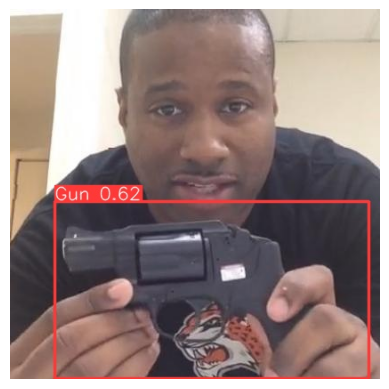

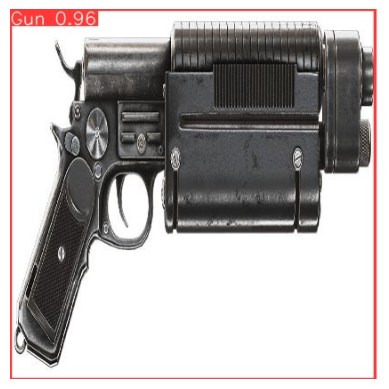

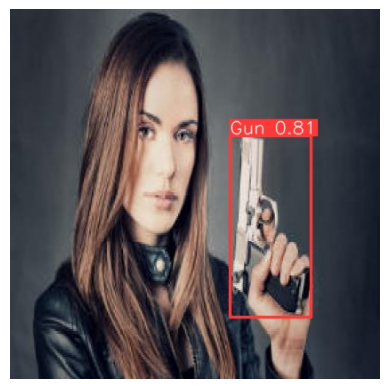

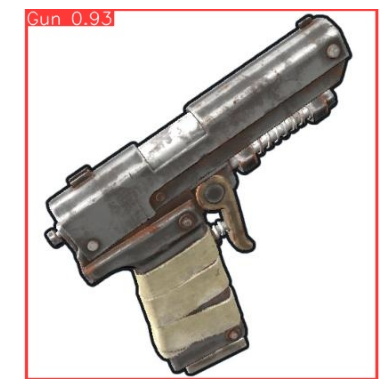

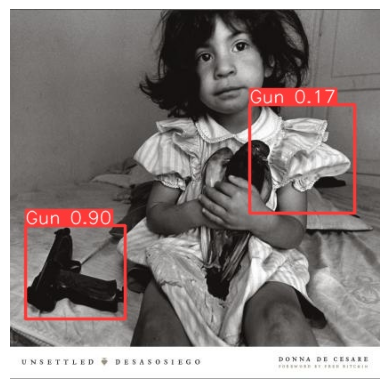

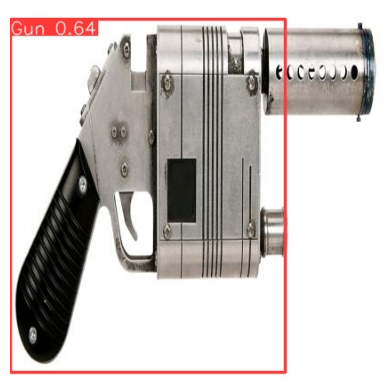

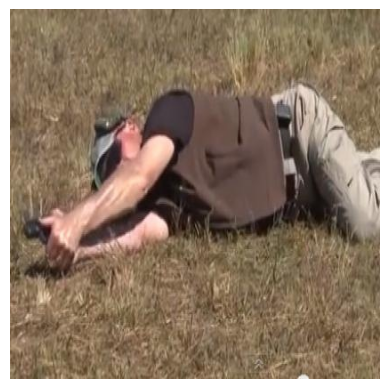

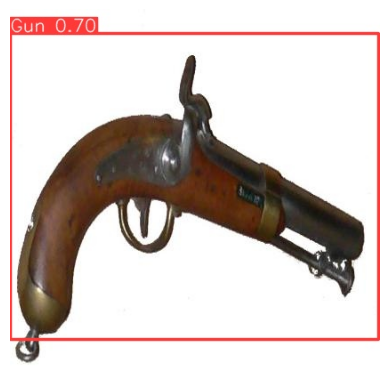

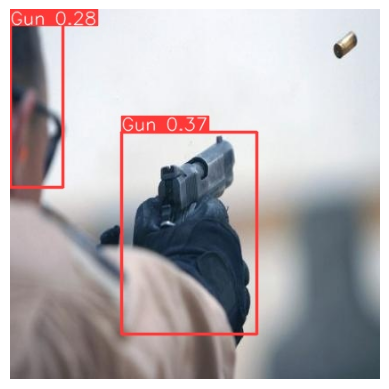

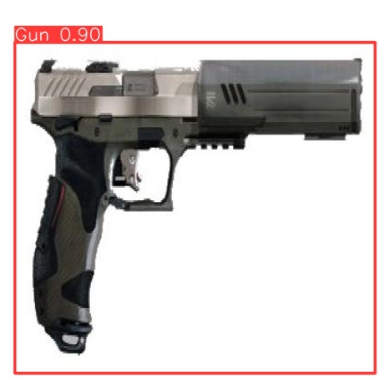

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_files = [f'result_{i}.jpg' for i in range(10)]

for image_file in image_files:
        img = mpimg.imread(image_file)
        plt.imshow(img)
        plt.axis('off')
        plt.show()